# Predicting Customer Churn

## Introduction

We will create a customer churn models to predict customer churn from a real life dataset from Telco - a telecom company.

Churn is when a individual drops out from business or ends a relationship with a company. Churn happens regularly and it is an issue across a many industries such as telecommunications, cable TV, SaaS. Even an employee leaving a company can be considered as Churn. In the case of cusomters, a company that can forsee churn can take proactive steps to retain customers and gain advantage against competition. 

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [208]:
telco=pd.read_csv('Churn.csv')

## Data Exploration

In [209]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [210]:
telco.shape

(3333, 21)

In [211]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

We can see that the data set does not contain any missing values. 
We will go ahead and look at the Churn Values.

In [212]:
telco.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

Let us group the data set by Churn values to see if we can get more insights into the dataset.

In [213]:
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


There isnt too much difference in the mean values of customers who have churned and not churned. However, when we look closely, we can see that the customers who have churned have higher CustServ_Calls, fewer Vmail_Messages and slightly higher Day_Mins and Eve_Mins

In [214]:
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

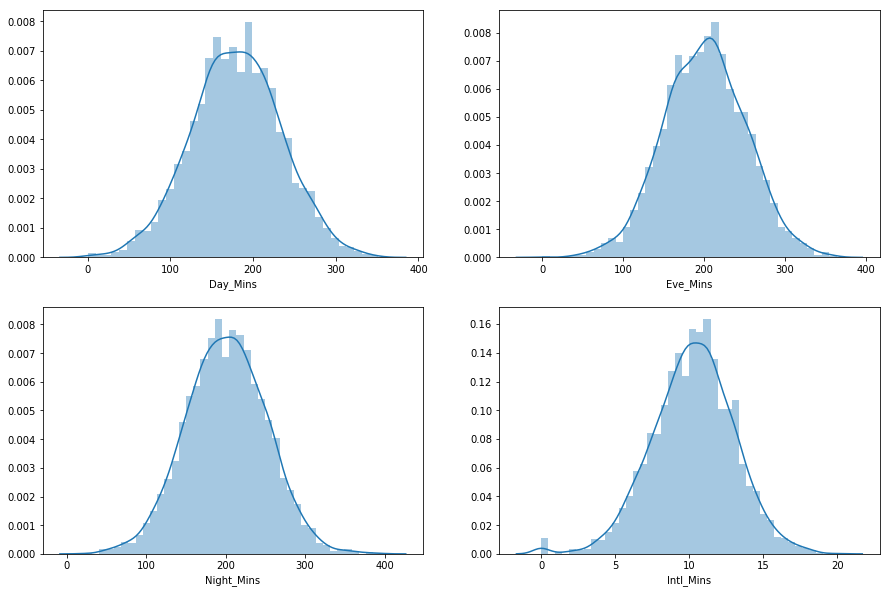

In [215]:
plt.subplots(figsize=(15,10))
ax1=plt.subplot(221)
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

ax2=plt.subplot(222)
sns.distplot(telco['Eve_Mins'])

ax3=plt.subplot(223)
sns.distplot(telco['Night_Mins'])

ax4=plt.subplot(224)
sns.distplot(telco['Intl_Mins'])

We can see that all the above values are normally distributed. Therefore, we do not need to apply any feature transformations to the data in order to continue doing further operations on the data.

We have seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

We will visualize this difference using a box plot and incorporate other features of interest.

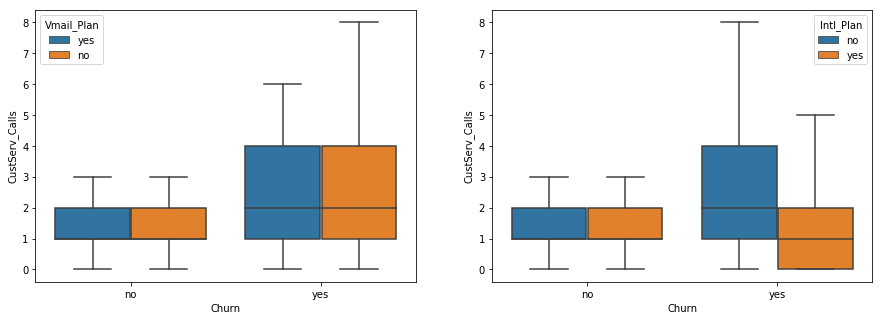

In [216]:
plt.subplots(figsize=(15,5))
ax1=plt.subplot(121)
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Vmail_Plan")
ax2=plt.subplot(122)
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Intl_Plan")


We can see that customers who churn have made more customer service calls. It is more so, when they dont have an international plan. If they do have an international plan however, then they leave fewer customer service calls.

## Modelling

We will now prepare our data for modelling.

In [217]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

From the above we can see that Vmail_Plan, Churn and Intl_Plan are object fields and they contain text values. We will replace 'Yes' with 1 and 'No' with 0 and remove Area_Code and Phone as they are unnecessary.

In [218]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())
print(telco['Intl_Plan'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


In [219]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


We will create a new feature called average night calls which is equalt to Night_Mins/Night_Calls.

In [222]:
# Create the new feature
telco['Avg_Night_Calls'] = telco.Night_Mins/telco.Night_Calls

# Print the first five rows of 'Avg_Night_Calls'
print(telco.Avg_Night_Calls.head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [223]:
features=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

We will create two random customer values for testing out models.

In [224]:
#Giving random nos to two new fields for testing
customer1=telco[features].head(2).drop([1],axis=0)
customer1=pd.DataFrame.copy(customer1)
customer1['Account_Length']=91
customer1['Vmail_Message']=23
customer1['Day_Mins']=91
customer1['Eve_Mins']=186
customer1['CustServ_Calls']=25

customer2=telco[features].head(2).drop([0],axis=0)
customer2=pd.DataFrame.copy(customer2)
customer2['Account_Length']=85
customer2['Vmail_Message']=24
customer2['Day_Mins']=55
customer2['Eve_Mins']=184
customer2['CustServ_Calls']=2

### Logistic Regression Classifier

In [233]:
# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

/home/abhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [234]:
# Predict the label of new_customer
print(clf.predict(customer1))
print(clf.predict(customer2))

[1]
[0]


Therefore, from our logistic regression predictor we know that the customer 1 will churn while 2 will not.

### Decision Tree Classifier

In [235]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco.Churn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [236]:
# Predict the label of new_customer
print(clf.predict(customer1))
print(clf.predict(customer2))

[1]
[0]


Therefore, again from our decision tree predictor we know that the customer 1 will churn while 2 will not.

### Random Forest Classifier

We will now split the data into test and train sets and check their accuracies. We will now use a random forest classifier to test the data.

In [237]:
cols=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [238]:
# Create feature variable
X = telco[cols].drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [239]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

/home/abhi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Metrics

In [240]:
# Compute accuracy
print(clf.score(X_test, y_test))

0.943


In [241]:
y_pred=clf.predict(X_test)

In [242]:
# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[846  11]
 [ 46  97]]


We will now train the model with more values and check the accuracy again.

In [247]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [248]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

/home/abhi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [249]:
# Compute accuracy
print(clf.score(X_test, y_test))

0.9505247376311844


We can see that the model achives marginally better accuracy when trained with more data.

In [252]:
y_pred=clf.predict(X_test)

In [253]:
# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[562   2]
 [ 31  72]]


#### Precision and Recall Scores

In [256]:
print(precision_score(y_test,y_pred))

0.972972972972973


In [257]:
# Print the recall
print(recall_score(y_test, y_pred))

0.6990291262135923


#### ROC Curve

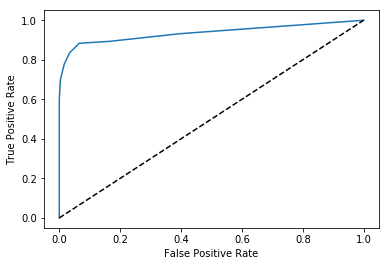

In [258]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [259]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.935705432761826


From the AUC we can see thae baseline for model is good and it perfoms quite well.

In [264]:
# Print the F1 score
print(f1_score(y_test,y_pred))

0.8135593220338985


### Feature Importances

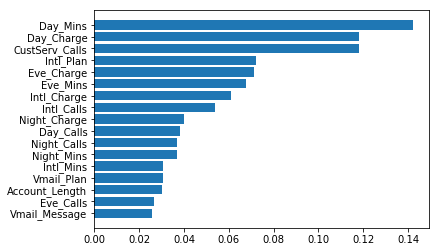

In [262]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()


We can see that Day_Mins, Day_Charge and CustServ_Calls have the higest importances while Vmail_Messge and Eve_Calls are have the least.